# Tarea 3. Midiendo rendimiento y riesgo en un portafolio.

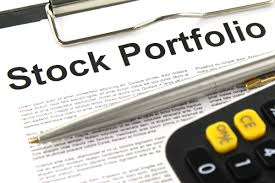

**Resumen.**
> En esta tarea, calcularás medidas de rendimiento esperado diario y volatilidad para cuatro diferentes portafolios. Usarás los históricos de precios que ya descargaste en la tarea anterior.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea4_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea4_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


## 1. Descarga de datos (10 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), Microsoft (MSFT), Walgreens (WBA), y Tesla Motors (TSLA) durante el periodo comprendido del primero de enero del 2015 hasta el día en que realicen la tarea.

1. Mostrar el DataFrame de los precios diarios (2 puntos).
2. Graficar los precios (3 puntos).
3. Mostrar el DataFrame de los rendimientos porcentuales diarios (2 puntos).
4. Graficar los rendimientos (3 puntos).

In [2]:
tickers2 = ["^GSPC", "MSFT", "WBA", "TSLA"]
tickers = ["MSFT", "WBA", "TSLA"]
tickers3 = ["^GSPC", "MSFT", "TSLA"]
start_date = '2015-01-01'
end_date = '2024-02-12'
df2 = yf.download(tickers2, start=start_date, end=end_date)['Adj Close']
df = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
df3 = yf.download(tickers3, start=start_date, end=end_date)['Adj Close']
rt3 = df3.pct_change().dropna()
rt = df.pct_change().dropna()
df2

[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  3 of 3 completed
[*********************100%%**********************]  3 of 3 completed


Ticker,MSFT,TSLA,WBA,^GSPC
Date,,,,
2015-01-02,40.378059,14.620667,56.039291,2058.199951
2015-01-05,40.006771,14.006000,54.933254,2020.579956
2015-01-06,39.419567,14.085333,55.073353,2002.609985
2015-01-07,39.920399,14.063333,56.481712,2025.900024
2015-01-08,41.094788,14.041333,57.182194,2062.139893
...,...,...,...,...
2024-02-05,404.901245,181.059998,22.160000,4942.810059
2024-02-06,404.741516,185.100006,23.110001,4954.229980
2024-02-07,413.285706,187.580002,22.809999,4995.060059


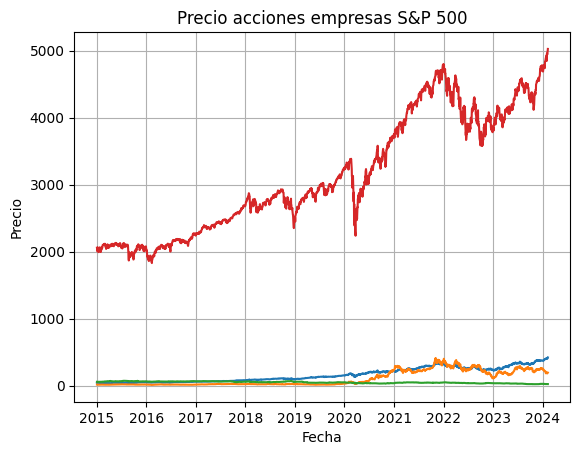

In [3]:
plt.figure()
plt.plot(df2)
plt.title("Precio acciones empresas S&P 500")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.grid()

In [4]:
rt2 = df2.pct_change().dropna()
rt2

Ticker,MSFT,TSLA,WBA,^GSPC
Date,,,,
2015-01-05,-0.009195,-0.042041,-0.019737,-0.018278
2015-01-06,-0.014678,0.005664,0.002550,-0.008893
2015-01-07,0.012705,-0.001562,0.025572,0.011630
2015-01-08,0.029418,-0.001564,0.012402,0.017888
2015-01-09,-0.008405,-0.018802,-0.024243,-0.008404
...,...,...,...,...
2024-02-05,-0.013545,-0.036454,-0.021201,-0.003186
2024-02-06,-0.000394,0.022313,0.042870,0.002310
2024-02-07,0.021110,0.013398,-0.012981,0.008241


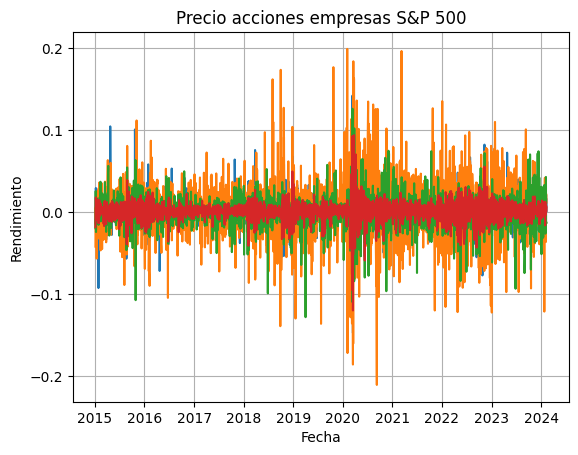

In [5]:
plt.figure()
plt.plot(rt2)
plt.title("Precio acciones empresas S&P 500")
plt.xlabel("Fecha")
plt.ylabel("Rendimiento")
plt.grid()

## 2. Rendimiento esperado y volatilidad para cada activo (20 puntos)

Usando los datos de rendimientos diarios de MSFT, WBA, y TSLA:

1. Reportar en un DataFrame el rendimiento esperado diario y la volatilidad diaria para cada activo. Reportar en otro DataFrame el rendimiento esperado anual y la volatilidad anual para cada activo (10 puntos).
2. Calcular la matriz de varianza-covarianza (base diaria) para los activos MSFT, WBA, y TSLA (5 puntos).
3. Calcular la matriz de correlación (base diaria) para los activos MSFT, WBA, y TSLA (5 puntos).

Para este punto, investigar los métodos `cov` y `corr` de los objetos tipo `pd.DataFrame`.

In [6]:
rend_diario = rt2.mean()
vol_diaria = rt2.std()

tabla1 = pd.DataFrame({
    "Rendimiento": rend_diario,
    "Volatilidad": vol_diaria
})
tabla1.index.name = "Diario"

tabla1.T

Diario,MSFT,TSLA,WBA,^GSPC
Rendimiento,0.001175,0.001757,-0.000221,0.000456
Volatilidad,0.017468,0.035488,0.019053,0.011492


In [7]:
tabla2 = pd.DataFrame({
    "Rendimiento": rend_diario * 252,
    "Volatilidad": vol_diaria * 252**(1/2)
})
tabla2.index.name = "Anual"

tabla2.T

Anual,MSFT,TSLA,WBA,^GSPC
Rendimiento,0.296077,0.442705,-0.055684,0.114946
Volatilidad,0.277294,0.563359,0.302463,0.182425


In [8]:
rt.cov()

Ticker,MSFT,TSLA,WBA
Ticker,,,
MSFT,0.000305,0.000254,0.000112
TSLA,0.000254,0.001259,0.000120
WBA,0.000112,0.000120,0.000363


In [9]:
rt.corr()

Ticker,MSFT,TSLA,WBA
Ticker,,,
MSFT,1.000000,0.410050,0.337791
TSLA,0.410050,1.000000,0.176992
WBA,0.337791,0.176992,1.000000


## 3. Rentimiento esperado y volatilidad para portafolios (45 puntos)

1. Calcular los rendimientos diarios de los siguientes portafolios. Reportar en un DataFrame el rendimiento esperado anual y la volatilidad anual para cada portafolio, calculando lo anterior tratando cada portafolio como si fuera un activo individual (20 puntos).
 - Portafolio 1: igualmente ponderado entre MSFT y TSLA.
 - Portafolio 2: 30% MSFT, 70% TSLA.
 - Portafolio 3: 10% MSFT, 90% TSLA.
 - Portafolio 4: 80% MSFT, 20% TSLA.
2. Para cada uno de los anteriores portafolios, reportar en otro DataFrame el rendimiento esperado anual y la volatilidad anual para cada portafolio, calculando lo anterior mediante las fórmulas de rendimiento esperado y volatilidad para portafolios derivadas en clase (20 puntos).
3. Comparar los resultados del punto uno con los del punto dos (5 puntos).

In [10]:
volM = rt["MSFT"].std()
volT = rt["TSLA"].std()

covMT = rt.cov()["MSFT"]["TSLA"]

w1 = [0.5, 0.3, 0.1, 0.8]
w2 = [0.5, 0.7, 0.9, 0.2]

rendimientos = []
volatilidades = []

for i in range(len(w1)):
    rend_port = (w1[i] * rt["MSFT"] + w2[i] * rt["TSLA"]).mean() * 252
    var_port = w1[i]**2 * volM**2 + w2[i]**2 * volT**2 + 2*w1[i]*w2[i] * covMT
    vol_port = (var_port**(1/2)) * 252**(1/2)

    rendimientos.append(rend_port)
    volatilidades.append(vol_port)

portafolios = pd.DataFrame({
    "Rendimiento": rendimientos,
    "Volatilidad": volatilidades
})
portafolios.index = ["Portafolio 1", "Portafolio 2", "Portafolio 3", "Portafolio 4"]
portafolios.index.name = "Anual"
portafolios.T

Anual,Portafolio 1,Portafolio 2,Portafolio 3,Portafolio 4
Rendimiento,0.369391,0.398716,0.428042,0.325402
Volatilidad,0.361379,0.435129,0.519011,0.287061


## 4. Gráfico de rendimientos esperados vs. volatilidad (25 puntos)

1. Crear un gráfico de puntos que muestre el rendimiento esperado y la volatilidad para cada uno de los activos, el índice S&P500, y los cuatro portafolios en el espacio rendimiento esperado (eje y) contra volatilidad (eje x). Etiquetar cada uno de los puntos y los ejes apropiadamente (15 puntos).
2. ¿Qué puede concluir acerca de la posición en el gráfico de los portafolios respecto a los activos? (10 puntos)

Text(0, 0.5, '$E[x]$')

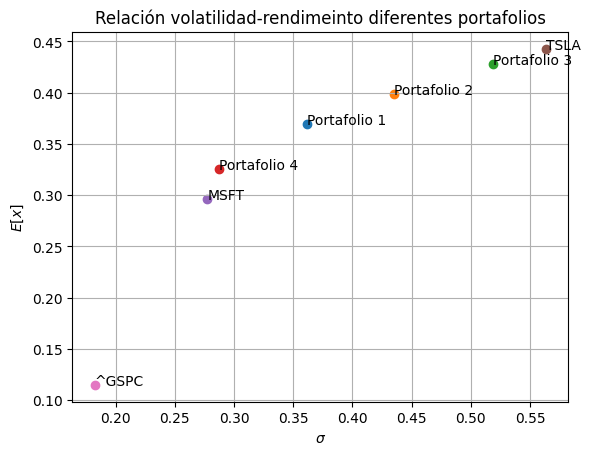

In [11]:
rend_vol = pd.DataFrame({
    "Rendimiento": rt3.mean() * 252,
    "Volatilidad": rt3.std() * 252**(1/2)
})

plt.figure()

for i in range(len(portafolios)):
    flag_portafolios = portafolios.iloc[i]
    name = portafolios.index[i]
    plt.scatter(flag_portafolios["Volatilidad"], flag_portafolios["Rendimiento"])
    plt.text(flag_portafolios["Volatilidad"], flag_portafolios["Rendimiento"], name)

for i in range(len(rend_vol)):
    flag_rend_vol = rend_vol.iloc[i]
    name = rend_vol.index[i]
    plt.scatter(flag_rend_vol["Volatilidad"], flag_rend_vol["Rendimiento"])
    plt.text(flag_rend_vol["Volatilidad"], flag_rend_vol["Rendimiento"], name)

plt.grid()
plt.title("Relación volatilidad-rendimeinto diferentes portafolios")
plt.xlabel("$\sigma$")
plt.ylabel("$E[x]$")

Se puede observar que se cumple el hecho de "a mayor volatilidad, mayor rendimiento". Por la naturaleza de las empresas Microsoft y Tesla, el portafolio donde se presenta a mayor escala la volatilidad y por ende el rendimiento esperado es en que la ponderación de Tesla es mayor, es decir, el portafolio 3. Por el lado contrario, el portafolio más conservador es en el que Microsoft tiene una ponderación mayor, es decir, en el portafolio 4.

En relación con los activos, se puede observar que Tesla es el único que sigue la linea de los portafolios, ubicándose por encima de ellos en volatilidad y rendimiento. Microsoft es una opción inferior, ya que cuenta con una volatilidad similar a la del portafolio 4, pero un rendimineto considerablemente menor. Por último, el S&P 500 se encuentra de igual manera fuera de la linea de portafolios, no obstante, puede ser una buena opción ya que ninguno de sus valores interfiere con los de alguno de los portafolios o activos.